In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy as sp
from scipy import stats

In [2]:
import itertools

#Primero, generamos los diccionarios. En este caso voy a automatizarlo porque para m=4 son 24 y para m=5 son 120

cuatro = [1.,2.,3.,4.]
cinco = [1.,2.,3.,4.,5.]
perm_4 = itertools.permutations(cuatro)
perm_5 = itertools.permutations(cinco)
diccionario_cuatro = {}
diccionario_cinco = {}

for i in range(1,25):
  diccionario_cuatro[str(list(next(perm_4)))] = i
 
for i in range(1,121):
  diccionario_cinco[str(list(next(perm_5)))] = i
 

In [3]:
def simbolo_4(a):
    return diccionario_cuatro.get(str(list(sp.stats.rankdata(a))))
  
def simbolo_5(a):
    return diccionario_cinco.get(str(list(sp.stats.rankdata(a))))
  
cuarteto = np.array([5,40,60,-100])
quinteto = np.array([5,100,1,-5,0])
simbolo_4(cuarteto),simbolo_5(quinteto)

(10, 95)

In [4]:
from itertools import islice

def window(seq,n):
    "Returns a sliding window (of width n) over data from the iterable"
    "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result



In [5]:

def sixtysymbols_n(data,n):
  
  sliding = window(data,n)
  symbols = []
  
  if n == 3:
    for i in range(len(data)-n):
      symbols.append(simbolo(next(sliding)))
    return(np.array(symbols))
  
  if n == 4: 
    for i in range(len(data)-n):
      symbols.append(simbolo_4(next(sliding)))
    return(np.array(symbols))

  if n == 5:
    for i in range(len(data)-n):
       symbols.append(simbolo_5(next(sliding)))
    return(np.array(symbols))

In [6]:
def entropia_permutacion(señal,n):
  d = np.math.factorial(n)  #La longitud del espacio muestral correspondiente
  simbolos = sixtysymbols_n(señal,n)
  simbolos = simbolos[simbolos != np.array(None)]
  frecuencias = sp.stats.relfreq(simbolos,d,(1,d+1))[0]

  no_nulas = frecuencias[frecuencias!=0]
  return -sum(no_nulas*np.log2(no_nulas))

In [7]:
def entropia_y_complejidad(señal,n):
  d = np.math.factorial(n)  
  
  simbolos = sixtysymbols_n(señal,n)
  simbolos = simbolos[simbolos != np.array(None)]
  
  counts = np.unique(simbolos, return_counts=True)[1]
  pi = counts/len(simbolos)

  pi_full = np.zeros(d)
  pi_full[:(len(pi))] = pi

  s= -sum(pi*np.log2(pi))/np.log2(d)
  c= s*(sum((pi_full-1/d)**2))
  
  return s,c

In [8]:
np.math.factorial(5)

120

In [245]:
señal=datos[1:60225:36]
print('entropia y complejidad   ' + str(entropia_y_complejidad(señal,5)))

entropia y complejidad   (0.7186603861482266, 0.04152572040434922)


In [246]:
len(señal)

1673

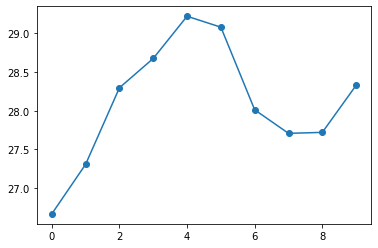

In [247]:
plt.plot(señal[:10],'-o')

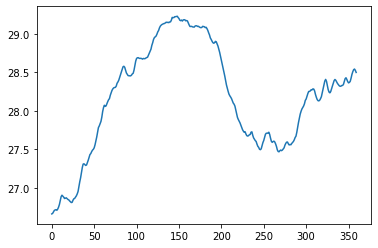

In [248]:
plt.plot(datos[:360])

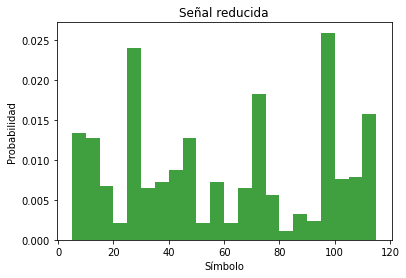

In [249]:
plt.title('Señal reducida')
plt.ylabel('Probabilidad')
plt.xlabel('Símbolo')
p_i, bins, patches = plt.hist(sixtysymbols_n(señal,5), bins=np.arange(5,120,5), density=1, facecolor='g', alpha=0.75)

In [34]:
import glob
path_integraciones = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020'
path_simulaciones_CESM = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020'
# Abro simulaciones
lista=[]
lista=glob.glob(path_simulaciones_CESM+'/nino_senal_CESM2*.txt')
lista.sort()

print(len(lista))
lista

10


['/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_1.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_10.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_2.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_3.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_4.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_5.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_6.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_7.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/nino_senal_CESM2_8.txt',
 '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Co

In [35]:
x=[]
y=[]
for file in lista:
  datos=np.loadtxt(file)
  señal=datos[1:len(datos):36]/max(datos)
  print('entropia y complejidad   ' + str(entropia_y_complejidad(señal,5)))
  r,s=entropia_y_complejidad(señal,5)
  x.append(r)
  y.append(s)



entropia y complejidad   (0.6864297253192561, 0.045614437274140295)
entropia y complejidad   (0.706171654118605, 0.04248841484131742)
entropia y complejidad   (0.7084841254396244, 0.04203982535415118)
entropia y complejidad   (0.7049274098983511, 0.043377871884566134)
entropia y complejidad   (0.7135709427668201, 0.04088558578117909)
entropia y complejidad   (0.6909178359486283, 0.04353643783741584)
entropia y complejidad   (0.7186603861482266, 0.04152572040434922)
entropia y complejidad   (0.72222437231347, 0.03893903672889299)
entropia y complejidad   (0.6887856832121536, 0.04395267370803568)
entropia y complejidad   (0.7065506544333922, 0.04132577148226358)


In [36]:
señal_ref_1 = np.sin(2*np.pi*np.linspace(0,160,60000))
señal_ref_2 = np.random.normal(1,1,60000)

u1,v1=entropia_y_complejidad(señal_ref_1[1:len(señal_ref_1):36],5)
u2,v2=entropia_y_complejidad(señal_ref_2[1:len(señal_ref_2):36],5)


In [37]:

u2,v2

(0.9919143224399702, 0.0006331962436187388)

In [38]:
u1,v1

(0.5028159451375509, 0.054865316311291344)

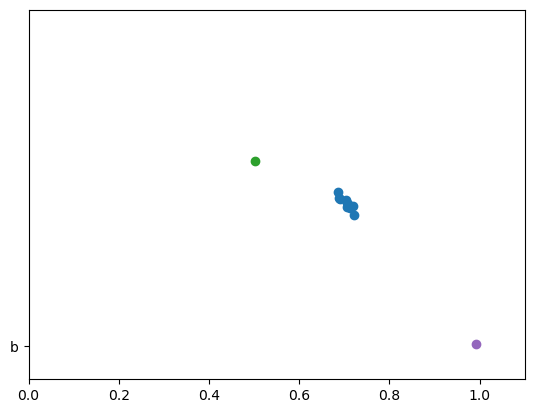

In [39]:
plt.plot(x,y,'o','b')
plt.plot(u1,v1,'o','g')
plt.plot(u2,v2,'o','r')
plt.xlim([0.0, 1.1])
plt.ylim([-0.01, 0.1])
plt.show()

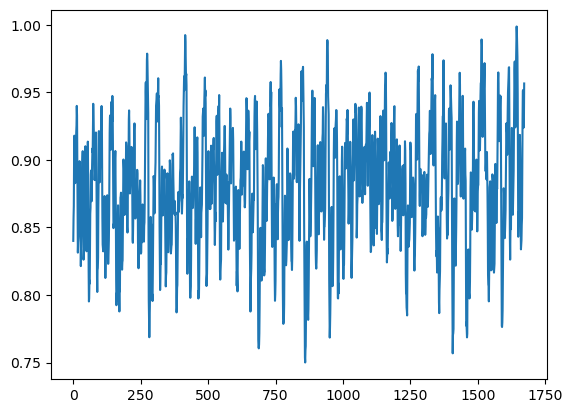

In [40]:
plt.plot(señal)

In [51]:

lista2=[]
lista2=glob.glob(path_integraciones+'/periodo4_masruido/*.txt')
lista2.sort()

print(len(lista2))

25


In [53]:
x2=[]
y2=[]
for file in lista2:
  datos=np.loadtxt(file)
  señal=datos[1:len(datos):36]/max(datos)
  #señal=datos[10000:len(datos):36]/max(datos)+0.045*ruido[10000:len(datos):36]
  print('entropia y complejidad   ' + str(entropia_y_complejidad(señal,5)))
  r2,s2=entropia_y_complejidad(señal,5)
  x2.append(r2)
  y2.append(s2)

entropia y complejidad   (0.5462903277387453, 0.06629410934639357)
entropia y complejidad   (0.530407838051854, 0.06475344708071963)
entropia y complejidad   (0.5286377493315775, 0.06767827599614626)
entropia y complejidad   (0.5401033082567418, 0.06564105970940225)
entropia y complejidad   (0.5364492780785525, 0.06493711981875262)
entropia y complejidad   (0.532010468508565, 0.06477730007419957)
entropia y complejidad   (0.5403251005101557, 0.06373068447937258)
entropia y complejidad   (0.5306354186227801, 0.07014897328446622)
entropia y complejidad   (0.5274694812245516, 0.06929506082592797)
entropia y complejidad   (0.5418573655176108, 0.06518648993021901)
entropia y complejidad   (0.5310425126188887, 0.06540691185442483)
entropia y complejidad   (0.5276333718183553, 0.06637150368645066)
entropia y complejidad   (0.5331446392889906, 0.06529755869380494)
entropia y complejidad   (0.5372054106954979, 0.06489445733146164)
entropia y complejidad   (0.5251888689834362, 0.0679782486452740

In [54]:

lista3=[]
lista3=glob.glob(path_integraciones+'/cerca_periodo4_caos/*.txt')
lista3.sort()

print(len(lista3))

25


In [55]:
x3=[]
y3=[]
for file in lista3:
  datos=np.loadtxt(file)
  señal=datos[1:len(datos):36]/max(datos)
  #señal=datos[10000:len(datos):36]/max(datos)+0.045*ruido[10000:len(datos):36]
  print('entropia y complejidad   ' + str(entropia_y_complejidad(señal,5)))
  r3,s3=entropia_y_complejidad(señal,5)
  x3.append(r3)
  y3.append(s3)

entropia y complejidad   (0.5239800941052761, 0.06986782538935392)
entropia y complejidad   (0.5163783479679176, 0.07083952384876943)
entropia y complejidad   (0.5114200834636856, 0.07065440480162277)
entropia y complejidad   (0.5326570078126389, 0.06823873191824083)
entropia y complejidad   (0.5266446164948518, 0.06827611234652255)
entropia y complejidad   (0.526876462500063, 0.06742608524861454)
entropia y complejidad   (0.5092325453573623, 0.07067112261070788)
entropia y complejidad   (0.5175457166372956, 0.06937559654712774)
entropia y complejidad   (0.5203273238949662, 0.06896182514633971)
entropia y complejidad   (0.522990576255402, 0.06910766761407468)
entropia y complejidad   (0.5227964128179944, 0.06900138403488078)
entropia y complejidad   (0.5179192054972053, 0.06983066050583964)
entropia y complejidad   (0.5307175914814134, 0.06788267878549745)
entropia y complejidad   (0.5168888574456819, 0.06818799145751708)
entropia y complejidad   (0.5207746173936717, 0.0670818552135911

In [56]:
lista4=[]
lista4=glob.glob(path_integraciones+'/periodo4/*.txt')
lista4.sort()

print(len(lista4))

5


In [57]:
x4=[]
y4=[]
for file in lista4:
  datos=np.loadtxt(file)
  señal=datos[10000:len(datos):36]/max(datos)
  print('entropia y complejidad   ' + str(entropia_y_complejidad(señal,5)))
  r4,s4=entropia_y_complejidad(señal,5)
  x4.append(r4)
  y4.append(s4)

entropia y complejidad   (0.5526484881822097, 0.0627670380424285)
entropia y complejidad   (0.55394600555997, 0.06255926842656005)
entropia y complejidad   (0.5487522611948992, 0.06273706470291153)
entropia y complejidad   (0.550051204484893, 0.06317215896875354)
entropia y complejidad   (0.5527844644909732, 0.06285058916002591)


In [87]:
lista5=[]
#lista5=glob.glob(root_dir+'Salidas_con_ruido/*.txt')
lista5=glob.glob(path_integraciones+'/periodo4_masruido/*.txt')
lista5.sort()

print(len(lista5))

25


In [88]:
x5=[]
y5=[]
for file in lista5:
  datos=np.loadtxt(file)
  ruido=np.zeros(len(datos))
  ruido=np.random.normal(0,.7,len(datos))
  señal=datos[10000:len(datos):36]/max(datos)+0.045*ruido[10000:len(datos):36]
  print('entropia y complejidad   ' + str(entropia_y_complejidad(señal,5)))
  r5,s5=entropia_y_complejidad(señal,5)
  x5.append(r5)
  y5.append(s5)

entropia y complejidad   (0.7326431597525542, 0.04769112280895627)
entropia y complejidad   (0.7131562045740798, 0.0481278373676967)
entropia y complejidad   (0.7396755494820063, 0.0432577706977177)
entropia y complejidad   (0.7362077959809173, 0.04753189191102717)
entropia y complejidad   (0.7252703147058573, 0.047130918407934194)
entropia y complejidad   (0.730335371380945, 0.04611946631687003)
entropia y complejidad   (0.7202254820656427, 0.04839585235401095)
entropia y complejidad   (0.7045771022169942, 0.0540066309840005)
entropia y complejidad   (0.713064750063754, 0.052964139701079174)
entropia y complejidad   (0.741618466047648, 0.042907559746540834)
entropia y complejidad   (0.7378336602107506, 0.04309689556631822)
entropia y complejidad   (0.7262934482228239, 0.04433463274587296)
entropia y complejidad   (0.7178541121501304, 0.049728838530116753)
entropia y complejidad   (0.7165673628291502, 0.05050610976108179)
entropia y complejidad   (0.7208366712168971, 0.0491180722583411

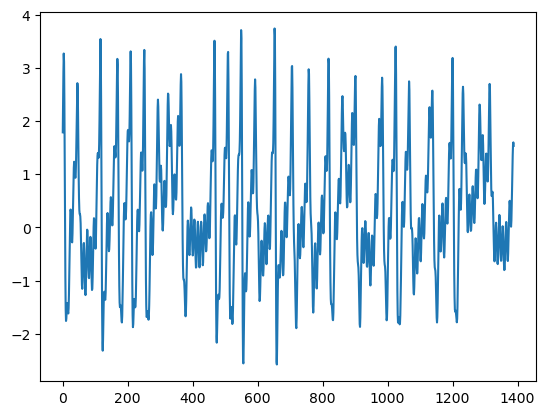

In [102]:
file=np.loadtxt('/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020/periodo4/nino_periodo4_sin_ruido_2.txt')


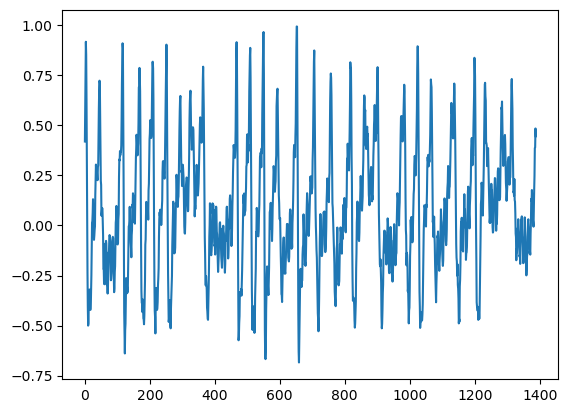

In [97]:
plt.plot(señal)

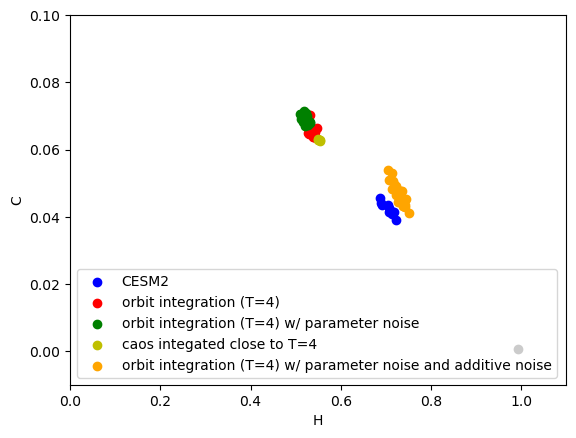

In [104]:
plt.scatter(x,y,color='b',label='CESM2')
plt.scatter(x2,y2,color='r',label='orbit integration (T=4)')
plt.scatter(x3,y3,color='g',label='orbit integration (T=4) w/ parameter noise')
plt.scatter(x4,y4,color='y',label='caos integated close to T=4')
plt.scatter(x5,y5,color='orange',label='orbit integration (T=4) w/ parameter noise and additive noise')
plt.scatter(u2,v2,color='k')
plt.xlim([0.0, 1.1])
plt.ylim([-0.01, 0.1])
plt.xlabel('H')
plt.ylabel('C')
plt.legend()
plt.show()
